# Technical Research Notebook

*This page will contain useful code snippets and descriptions*

### JSON files

JSON files are the file format of choice for many types of data exchanges.

[JSON file format site](https://www.json.org/json-en.html)<br>
[Beginner's Guide to JSON (stack overflow article)](https://stackoverflow.blog/2022/06/02/a-beginners-guide-to-json-the-data-format-for-the-internet/)

### Personal Google Data Download

I downloaded my personal google data and began to explore what it can tell me. I started with my browser history, because it was the biggest file. Even without reading page content, URLs plus timestamps can reveal patterns such as daily schedule (sleep/wake/work patterns), work industry, health research, financial stress, religious affiliation, political leaning, relationship status, travel patterns, and mental health indicators. 

I used several python libraries to process the browser history date and create a dataframe. My Intro to Data Science class came in handy, because I was already introduced to the Pandas library in that course. In the code block below, pathlib and Path are imported to help transform strings into file paths. json is used to help parse the JSON file. numpy is used for math (ratios etc). Pandas is a popular data science library, as previously mentioned. re was imported for filtering with regex. urllib.parse and urlparse were used to process the URL field in the JSON file.

[Pandas Library Documentation](https://pandas.pydata.org/) <br>
[JSON Geeks for Geeks article](https://www.geeksforgeeks.org/python/python-json/)<br>
[JSON in Python documentation](https://docs.python.org/3/library/json.html)<br>
[Pathlib Geeks for Geeks article](https://www.geeksforgeeks.org/python/pathlib-module-in-python/)<br>
[Urllib Geeks for Geeks article](https://www.geeksforgeeks.org/python/python-urllib-module/)<br>
[re in Python documentation](https://docs.python.org/3/library/re.html)<br>
[Numpy Library Documentation](https://numpy.org/)<br>

In [3]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
import re
from urllib.parse import urlparse

The output below is generate by running a python file for processing and doing a few initial calculations. Just from the timestamps, a pretty clear picture of when I sleep and work emerges. The entropy score has to do with the variety of domains visted, as does the repeat domain ratio. I will continue exploring this data as well as others in the google data download.<br><br>

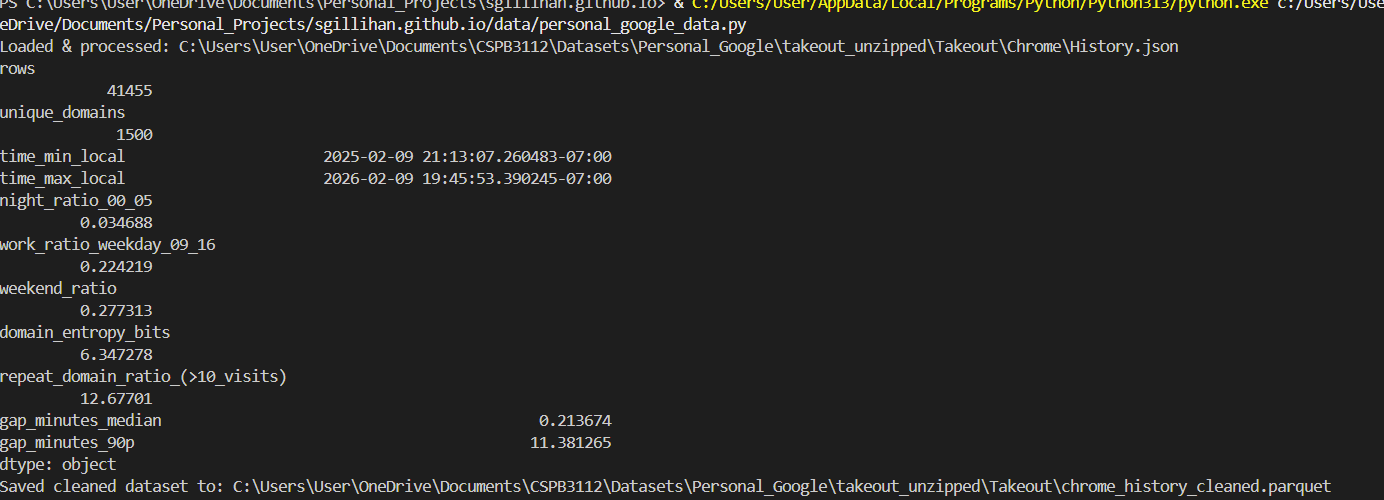